<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/07_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes Classifier
* Naive Bayes is a probabilistic classifier based on Bayes’ Theorem. It’s called “naive” because it assumes all features are independent of each other given the class.

## Math behind this classifier
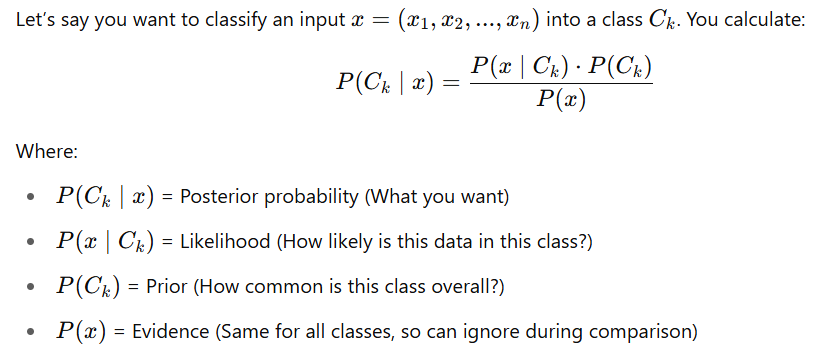
* The "Naive" part is given by this function
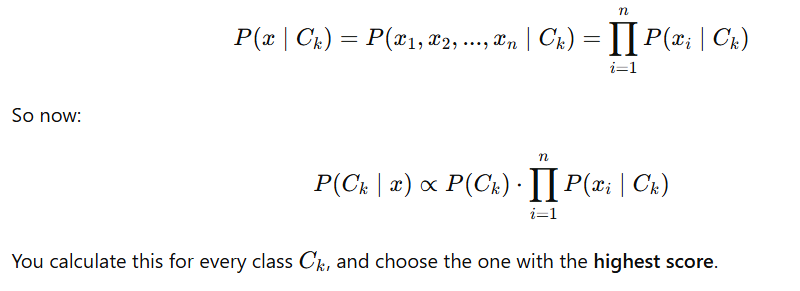
* We assume that the features are conditionally independent given the class

* There are different types of naive bayes classifiers like Gaussian,multinomial and bernoulli

### In this notebook we will use naive_bayes classifier on different datasets

## Titanic
## In this section we will classify passengers on titanic into two class Survived , Not Survived
Dataset used is [Titanic](https://www.kaggle.com/competitions/titanic/overview) on kaggle.

We have used Gaussian naive bayes classifier

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
train_dataset=pd.read_csv('/content/train.csv')

In [104]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
train_dataset=train_dataset.drop(['Name','Ticket','Cabin','Embarked','Parch','SibSp','Pclass','PassengerId'],axis=1)
train_dataset.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [106]:
train_dataset = pd.get_dummies(train_dataset, drop_first=True)

In [107]:
train_dataset.head()

,Survived,Age,Fare,Sex_male
0,0,22.0,7.2500,True
1,1,38.0,71.2833,False
2,1,26.0,7.9250,False
3,1,35.0,53.1000,False
4,0,35.0,8.0500,True


In [108]:
train_dataset.isnull().sum()

,0
Survived,0
Age,177
Fare,0
Sex_male,0


In [109]:
train_dataset['Age']=train_dataset['Age'].fillna(train_dataset['Age'].mean())
train_dataset.isnull().sum()

,0
Survived,0
Age,0
Fare,0
Sex_male,0


In [110]:
train_dataset.head()

,Survived,Age,Fare,Sex_male
0,0,22.0,7.2500,True
1,1,38.0,71.2833,False
2,1,26.0,7.9250,False
3,1,35.0,53.1000,False
4,0,35.0,8.0500,True


In [111]:
x=train_dataset.drop('Survived', axis=1)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


In [112]:
y=train_dataset['Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [113]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [114]:
model.fit(x,y)

GaussianNB()

In [115]:
model.score(x,y)

0.7811447811447811

In [116]:
data=pd.read_csv('/content/test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
test=data.drop(['Name','Ticket','Cabin','Embarked','Parch','SibSp','Pclass','PassengerId'],axis=1)
test = pd.get_dummies(test, drop_first=True)

In [118]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

,0
Age,0
Fare,0
Sex_male,0


In [119]:
test.head()

,Age,Fare,Sex_male
0,34.5,7.8292,True
1,47.0,7.0000,False
2,62.0,9.6875,True
3,27.0,8.6625,True
4,22.0,12.2875,False


In [120]:
Survived=model.predict(test)

In [121]:
output={'PassengerId':data['PassengerId'],'Survived':Survived}
df=pd.DataFrame(output)
df.to_csv('/content/KaggleSubmission.csv',index=False)

Submitting this to [Kaggle titanic competition](https://www.kaggle.com/competitions/titanic/overview) gives a score of 0.75119

## In this section we will use Multinomial naive bayes classifier - Most common for text classification to classify emails as spam or not spam (ham)



In [122]:
import matplotlib.pyplot as plt
import pandas as pd
emails=pd.read_csv('/content/spam.csv')

In [123]:
emails.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
emails.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [125]:
# ML models understand numbers not text hence we will convert both columns into numeric features
emails['is_spam']=emails['Category'].apply(lambda x: 1 if x=='spam' else 0)
emails.head()

,Category,Message,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Now we need to convert the 'Message' column for this count vectoriser is used.



In [126]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [127]:
x=cv.fit_transform(emails.Message.values).toarray()
y=emails.Category #even is_spam can be used but here we are trying to see how sklearn internally maps categories to numbers , encodes and decodes

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [129]:
x_train.shape # we have around 8709 unique words hence the number of columns

(3900, 8709)

In [130]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [131]:
#using set would lead to wrong answers due to reordering and duplicates removal, hence use [] list
sample = [
    'Hey, are we still on for the meeting tomorrow at 10?',
    'Hey, how are you?',
    'Congratulations! You have won a free iPhone. Click here to claim your prize!',
    'Your Amazon order has been shipped. Track your package here'
]

In [132]:
sample_count=cv.transform(sample)
nb.predict(sample_count)

array(['ham', 'ham', 'spam', 'ham'], dtype='<U4')

In [133]:
nb.score(x_test,y_test)

0.9850478468899522

In [134]:
# We can directly use a pipeline for simplicity
from sklearn.pipeline import Pipeline
p=Pipeline([
    ('vectorize',CountVectorizer()),
    ('NaiveBayes',MultinomialNB())
])

In [135]:
p.fit(emails.Message,emails.Category)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('NaiveBayes', MultinomialNB())])

In [136]:
p.predict(["Win a free trip to Bahamas!"])

array(['spam'], dtype='<U4')

## The third section uses naive bayes classifier to classify [load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) dataset from `sklearn.datasets`

It’s a dataset about wine chemical properties. The goal is to classify wines into 3 different cultivars (wine types) based on lab features like alcohol content, magnesium, flavonoids, etc.

In [137]:
from sklearn.datasets import load_wine
wines=load_wine()

In [138]:
dir(wines)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [139]:
wines.data.shape

(178, 13)

In [140]:
#178 samples, 13 features
wines.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [141]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [142]:
wines.target #3 classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [143]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

since the features are continous value we will use gaussian naive bayes classifier

In [144]:
from sklearn.naive_bayes import GaussianNB
wine_model=GaussianNB()

In [145]:
x=wines.data
y=wines.target

In [146]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [147]:
wine_model.fit(xtrain,ytrain)

GaussianNB()

In [148]:
wine_model.predict([xtest[5]]),ytest[5]

(array([0]), np.int64(0))

In [149]:
wine_model.score(xtest,ytest)

1.0